#Корреляционный анализ:

- это статистический метод, который используется для изучения взаимосвязи между двумя или более переменными. Главная цель корреляционного анализа - определить, насколько сильно и в каком направлении связаны эти переменные.

Основные понятия корреляционного анализа:
1. *Коэффициент корреляции* - это числовое значение, которое показывает степень взаимосвязи между двумя переменными. Коэффициент корреляции может колебаться от -1 до 1. Значения близкие к 1 указывают на сильную положительную корреляцию, значения близкие к -1 указывают на сильную отрицательную корреляцию, а значение равное 0 означает отсутствие корреляций.

2. *Положительная корреляция*. Если значения одной переменной возрастают, то значения другой переменной также увеличиваются.

3. *Отрицательная корреляция*. Если значения одной переменной увеличиваются, то значения другой переменной уменьшаются.

4. *Нулевая корреляция*: отсутствие взаимосвязи между переменными.

Корреляционный анализ позволяет определить, есть ли статистически значимая связь между переменными, и какой ее характер. Важно помнить, что корреляция не всегда означает причинно-следственную связь между переменными - она лишь отражает степень и направление их взаимосвязи.

Корреляционный анализ широко используется в многих областях, включая науку, экономику, медицину, социологию и др., для выявления закономерностей и анализа данных.

#**Коэффициенты корреляции**

Существует несколько коэффициентов корреляции, которые используются для измерения степени взаимосвязи между переменными. Основные типы коэффициентов корреляции включают:

1. *Коэффициент Пирсона (Pearson's r)* - Самый распространенный и широко используемый коэффициент корреляции.
- Измеряет линейную зависимость между двумя количественными переменными.
- Может колебаться от -1 (полная отрицательная корреляция) до 1 (полная положительная корреляция).

2. *Коэффициент Спирмена (Spearman's rho)*. - Используется для измерения силы монотонной взаимосвязи между двумя переменными.
- Не требует нормального распределения данных и может использоваться с ранговыми данными.

3. *Коэффициент Кендалла (Kendall's tau)*. - Также измеряет силу монотонной взаимосвязи между переменными.
- Чувствителен к выбросам в данных и показывает, насколько часто конкретные значения одной переменной связаны с конкретными значениями другой переменной.


## Урок 2. ДЗ2. Применение корреляционного анализа
Используя датасет «World Happiness Report 2019», изучите взаимосвязи между различными факторами, которые влияют на уровень счастья в разных странах.
### Задание № 1
Задание 1: Анализ корреляции между ВВП на душу населения и оценкой счастья.
Используйте коэффициент Пирсона для определения взаимосвязи между ВВП на душу населения и оценками счастья.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

### Первичный анализ

In [2]:
df = pd.read_csv('world_happiness_report_2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [6]:
df['Overall rank'].value_counts()

Overall rank
1      1
108    1
101    1
102    1
103    1
      ..
53     1
54     1
55     1
56     1
156    1
Name: count, Length: 156, dtype: int64

DataFrame содержит 156 записи,9 столбцов с различными типами данных:  
  - ` Overall rank` целочисленный тип (int64), каждое значение в столбце непустое (non-null), представляет собой порядковый номер.  
  - `Country or region` страна иои регион, тип данных object, Все значения непустые.  
  - `Score` видимо уровень счастья, тип данных с плавающей запятой (float64), отражает продолжительность сна, все значения непустые.
  - `Occupation:` тип данных object, предположительно содержит информацию о профессии участников, все значения непустые.
  - `GDP per capita` ВВП на душу населения, тип данных с плавающей запятой (float64), все значения непустые.
  - `Social support` Социальная поддержка, тип данных с плавающей запятой (float64), все значения непустые.
  - `Healthy life expectancy` Ожидаемая продолжительность здоровой жизни,, тип данных с плавающей запятой (float64) все значения непустые.
  - `Freedom to make life choices`, Свобода делать жизненный выбор, тип данных с плавающей запятой (float64) все значения непустые.
  - `Generosity` щедрость, тип данных с плавающей запятой (float64) все значения непустые.
  - `Perceptions of corruption` уровень коррупции, тип данных с плавающей запятой (float64) все значения непустые.

Пустых значений в датасете нет

Анализ статистических характеристик

In [7]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [8]:
df.describe(include='object')

,Country or region
count,156
unique,156
top,Finland
freq,1


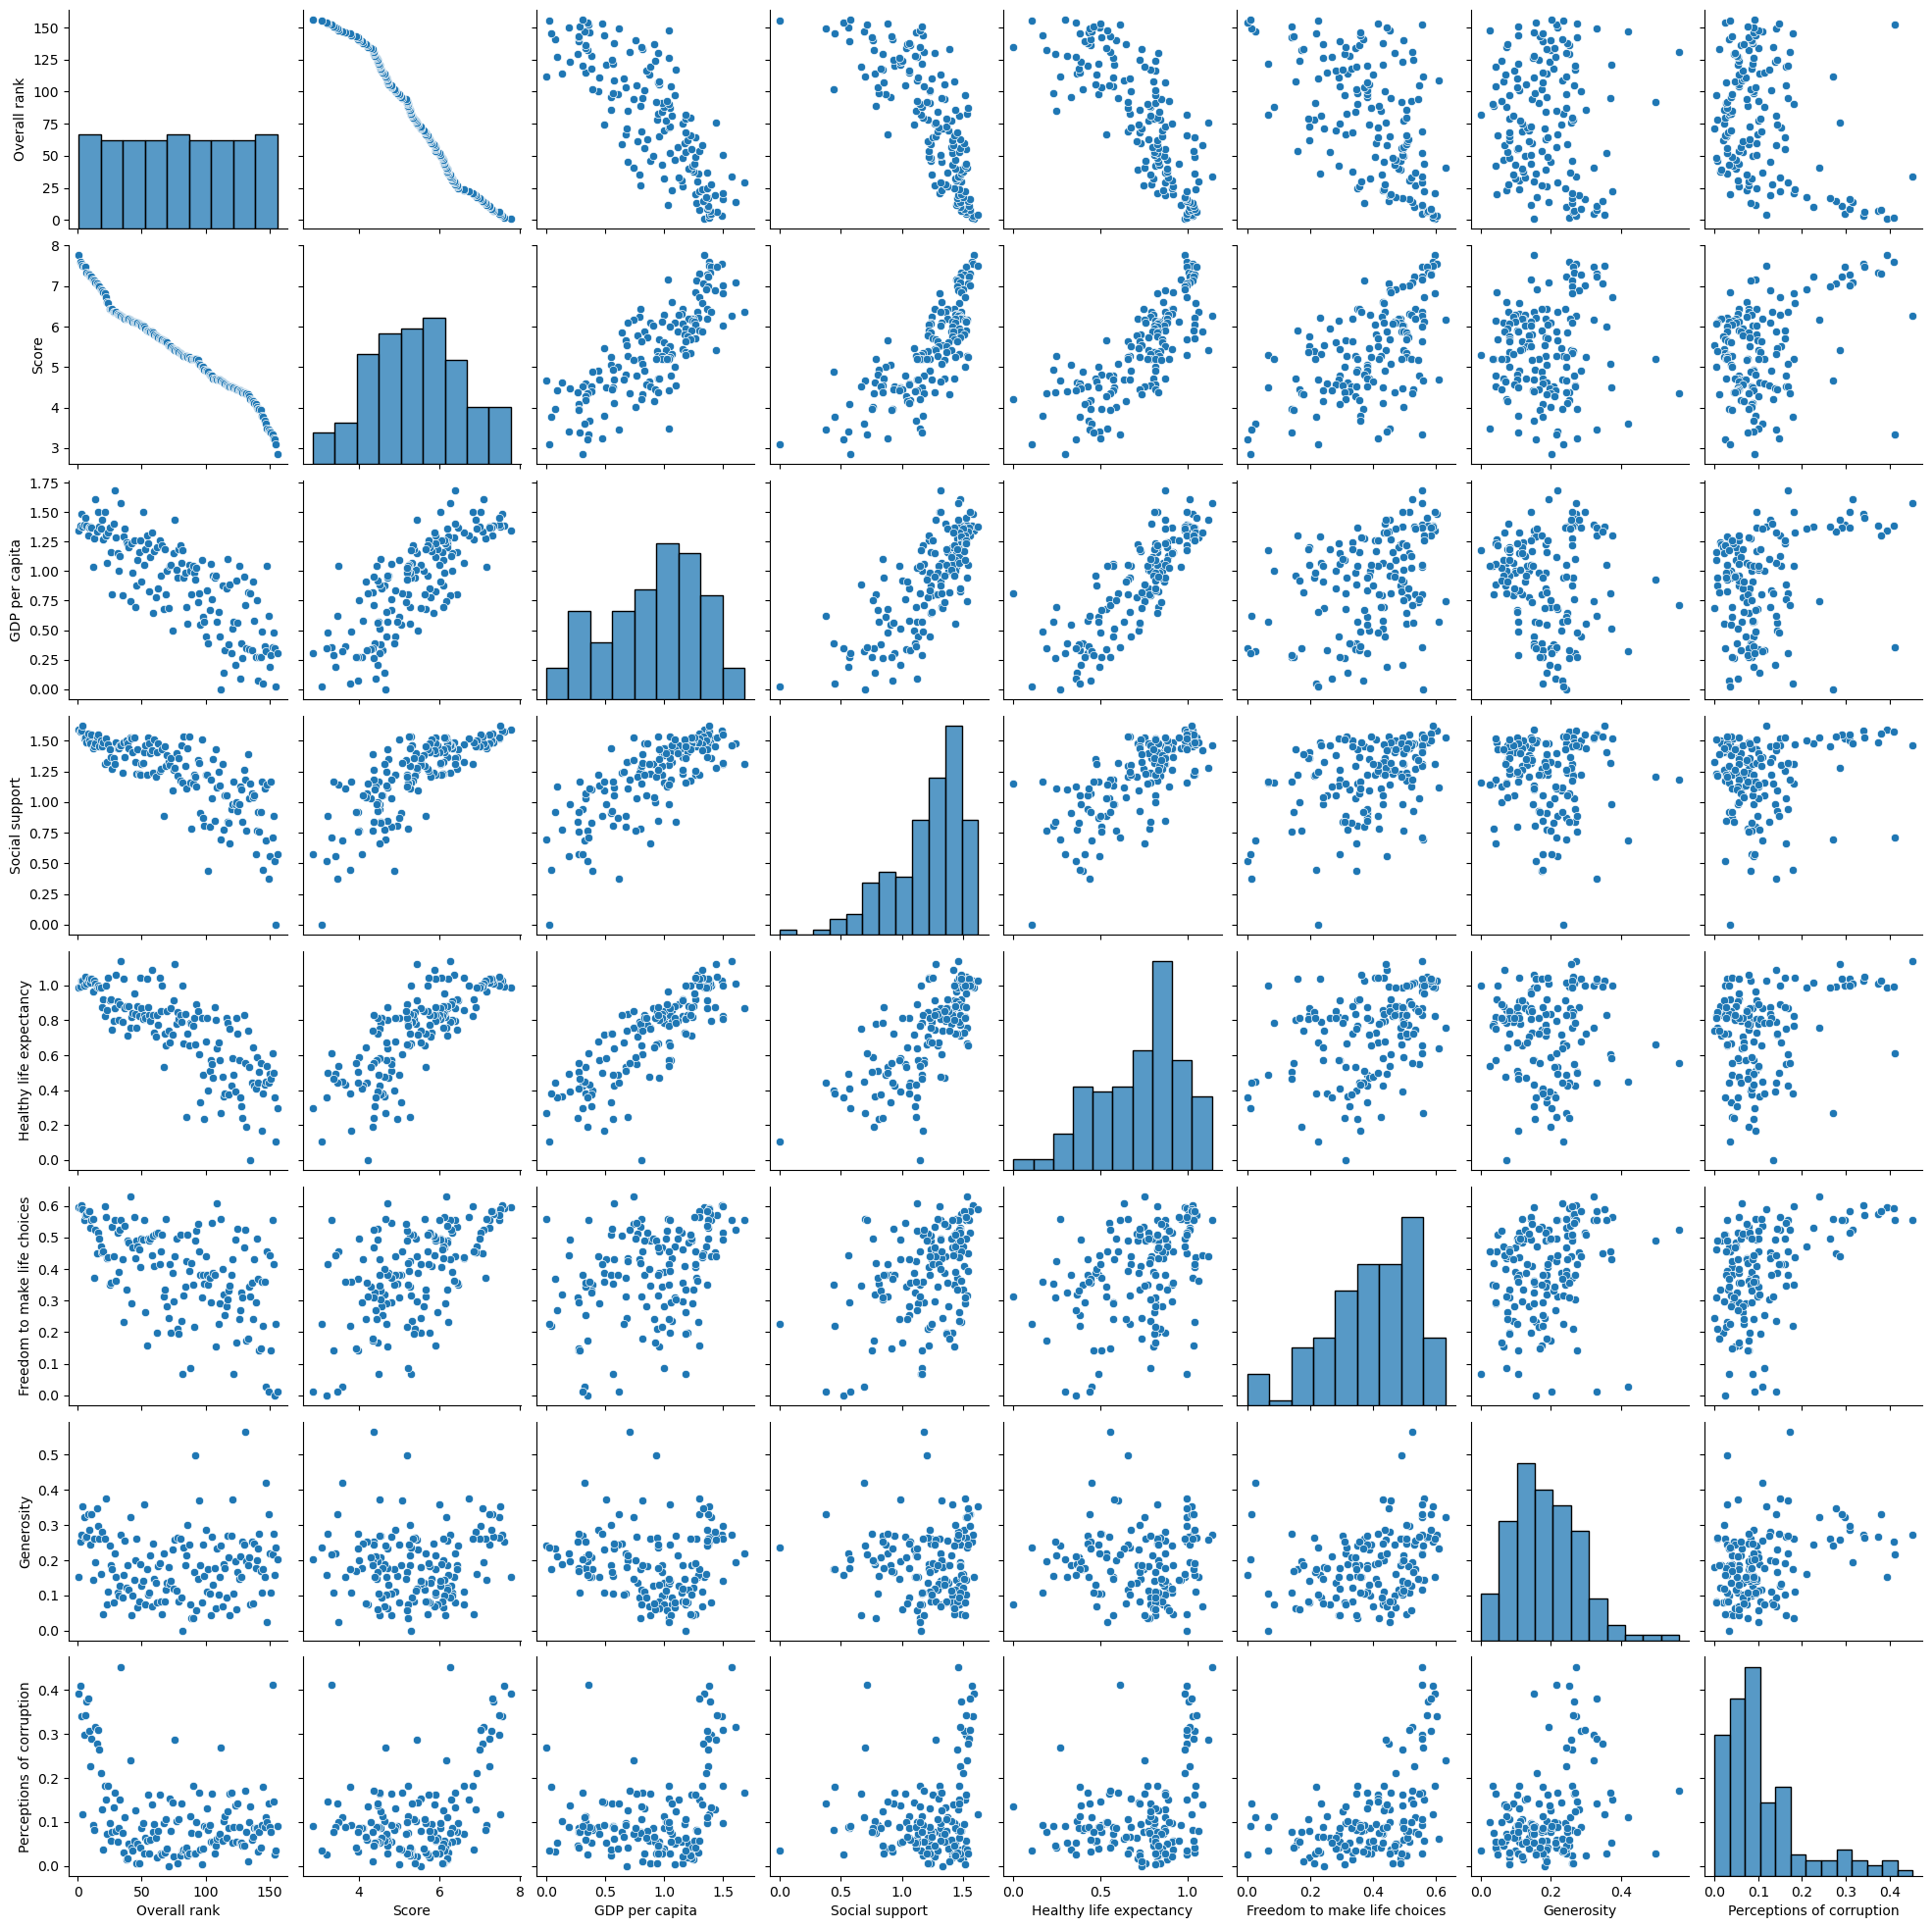

In [9]:
sns.pairplot(df)

<Axes: xlabel='Score', ylabel='Density'>

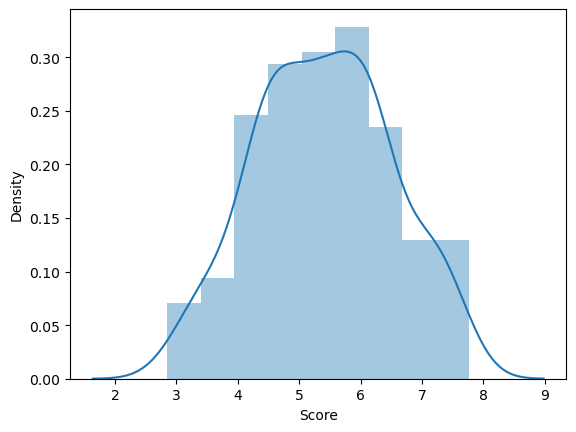

In [10]:
#Посмотрим распределение целевой переменной
sns.distplot(df['Score'], kde = True)

In [ ]:
#По парным графикам выше можно предположить линейную прямую взаимосвязи между ВВП на душу населения и оценками счастья, проверим

In [11]:
import scipy.stats as stats
# Вычисляем коэффициент корреляции Пирсона
correlation_coefficient, p_value = stats.pearsonr(df['Score'], df['GDP per capita'])

print(f"Коэффициент корреляции Пирсона: {correlation_coefficient}")
print(f"P-значение: {p_value}")

Коэффициент корреляции Пирсона: 0.7938828678781276
P-значение: 4.315480913319406e-35


In [12]:
df['Score'].corr(df['GDP per capita'], method = 'pearson')

0.7938828678781275

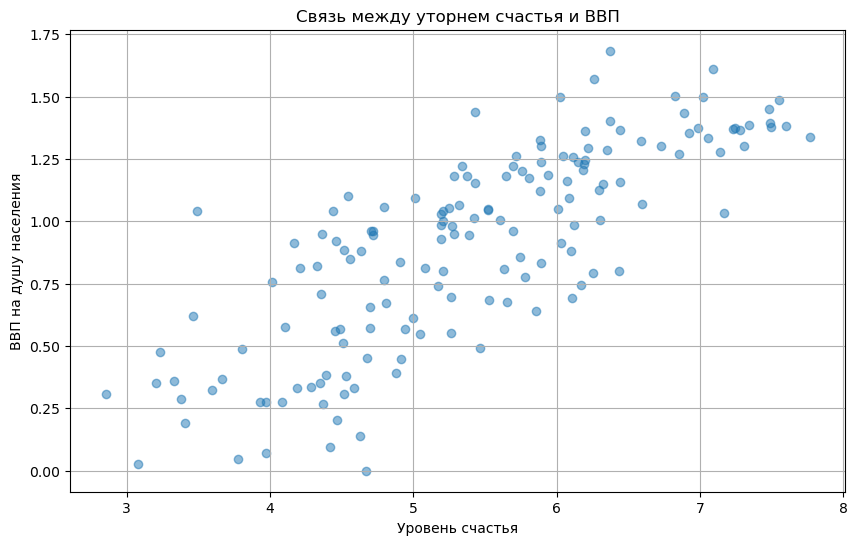

In [14]:
import matplotlib.pyplot as plt

# Построение графика рассеивания
plt.figure(figsize=(10, 6))
plt.scatter(df['Score'], df['GDP per capita'], alpha=0.5)
plt.title('Связь между уторнем счастья и ВВП')
plt.xlabel('Уровень счастья')
plt.ylabel('ВВП на душу населения')
plt.grid(True)
plt.show()


Коэффициент корреляции Пирсона: 0.79, что подтверждает сильную прямую линейную зависимость между  показателями, P-значение значительно ниже стандартного порога в 0.05, что подтверждает статистическую значимость нашего результата

## Задание 2: Исследование влияния социальной поддержки на оценку счастья.
Примените коэффициент Спирмена для анализа отношений между социальной поддержкой и оценками счастья .

#По парным графикам так же можно предположить линейную прямую взаимосвязи между социальной поддержкой и оценками счастья, проверим. Вычислим коэффициента Спирмена

In [17]:
from scipy.stats import spearmanr

coef, p = spearmanr(df['Score'], df['Social support'])
print(f"Коэффициент корреляции Спирмена : {coef}, P-value: {p}")

Коэффициент корреляции Спирмена : 0.8161807357057258, P-value: 1.613098226311642e-38


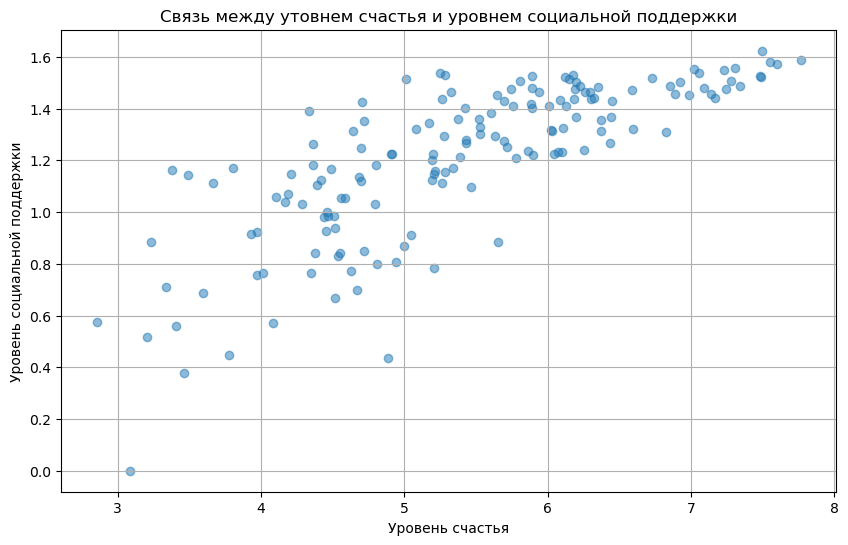

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# График рассеивания с линией тренда для Stress Level и Quality of Sleep
plt.figure(figsize=(10, 6))
plt.scatter(df['Score'], df['Social support'], alpha=0.5)
plt.title('Связь между утовнем счастья и уровнем социальной поддержки')
plt.xlabel('Уровень счастья')
plt.ylabel('Уровень социальной поддержки')
plt.grid(True)
plt.show()

Коэффициент корреляции Пирсона: 0.82, что подтверждает сильную прямую линейную зависимость между показателями уровня счастья и уровнем социальной поддержки, P-значение значительно ниже стандартного порога в 0.05, что подтверждает статистическую значимость нашего результата

## Задание 3: Взаимосвязь между продолжительностью здоровой жизни и оценками счастья.
Используйте коэффициент корреляции Кэнделла для изучения связи между ожидаемой продолжительностью здоровой жизни и уровнем счастья.

Обоснование:  
Коэффициент корреляции Кэнделла выбран для анализа, так как он позволяет изучить монотонные взаимосвязи между количественной (возраст) и порядковой (качество сна) переменными без предположения о линейности связи или равномерности шкал. Визуализация данных с помощью графика рассеивания поможет наглядно определить, как распределяются данные и подтверждает ли визуальное наблюдение результаты расчета коэффициента Кэнделла.

Коэффициент корреляции Кэнделла: 0.6026128531700046, P-value: 8.000780684230196e-29


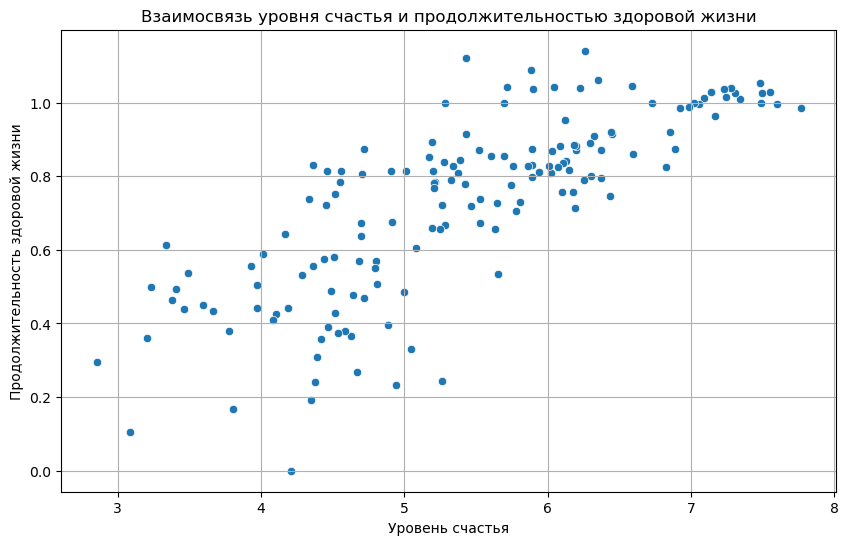

In [19]:
from scipy.stats import kendalltau

# Расчет коэффициента Кэнделла
tau, p_value = kendalltau(df["Score"], df["Healthy life expectancy"])
print(f"Коэффициент корреляции Кэнделла: {tau}, P-value: {p_value}")

# Визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Score", y="Healthy life expectancy", data=df)
plt.title('Взаимосвязь уровня счастья и продолжительностью здоровой жизни')
plt.xlabel('Уровень счастья')
plt.ylabel('Продолжительность здоровой жизни')
plt.grid(True)
plt.show()


Исходя из полученного значения коэффициента корреляции Кэнделла 0,6 и крайне низкого p-value , мы можем сделать вывод о наличии статистически значимой положительной монотонной средней взаимосвязи между уровнем счастья и продолжительностью здоровой жизни. 

## Задание 4: Свобода делать жизненный выбор и уровень счастья.
Проанализируйте, используя коэффициент корреляции Пирсона, как свобода делать жизненный выбор влияет на уровень счастья.

Коэффициент корреляции Пирсона: 0.5667418257199902
P-значение: 1.23792436279821e-14


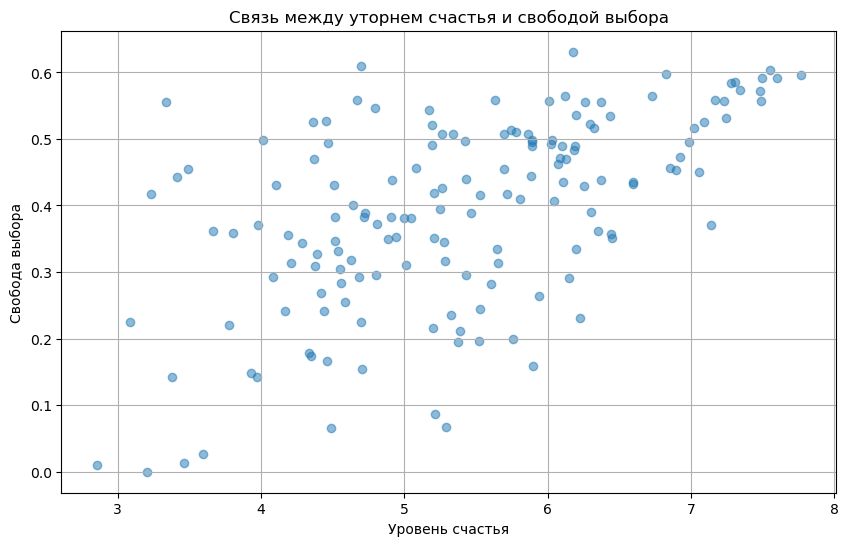

In [20]:
# Вычисляем коэффициент корреляции Пирсона
correlation_coefficient, p_value = stats.pearsonr(df['Score'], df['Freedom to make life choices'])

print(f"Коэффициент корреляции Пирсона: {correlation_coefficient}")
print(f"P-значение: {p_value}")

# Построение графика рассеивания
plt.figure(figsize=(10, 6))
plt.scatter(df['Score'], df['Freedom to make life choices'], alpha=0.5)
plt.title('Связь между уторнем счастья и свободой выбора')
plt.xlabel('Уровень счастья')
plt.ylabel('Свобода выбора')
plt.grid(True)
plt.show()


Коэффициент корреляции Пирсона: 0.56, что подтверждает среднюю прямую линейную зависимость между показателями, P-значение значительно ниже стандартного порога в 0.05, что подтверждает статистическую значимость нашего результата

## Вопросы для обсуждения:
Какой из факторов наиболее сильно связан с уровнем счастья в анализируемых странах? В чем может заключаться причина такой взаимосвязи?5

Исходя из полученных коэффициентов корреляции уровня счастья с различными показателями можно сделать вывод о том, что наиболее сильная зависимость существует между уровнем счастья и уровнем социальной поддержки, то есть чем выше уровень социальной поддержки, тем более счастливо чувствует себя человек. Причина такой взаимосвязи очевидна, так как каждый человек хочет чувствовать себя защищенным, именно это чувство ему и дает высокий уровень социальной поддержки. 

In [28]:
df[['Country or region', 'Score']].sort_values('Score')

,Country or region,Score
155,South Sudan,2.853
154,Central African Republic,3.083
153,Afghanistan,3.203
152,Tanzania,3.231
151,Rwanda,3.334
...,...,...
4,Netherlands,7.488
3,Iceland,7.494
2,Norway,7.554
1,Denmark,7.600


Для подтверждения этого вывода достаточно посмотреть отсортированный по значению уровня счастья столбец в соответсвии со странами, видно что найменьший уровень счастья испытывают жители неразвитых стран с минимальным уровнем социальной защиты